# KNN Exhibition

In this notebook we'll be looking at an implementation of the K-Nearest-Neighbors algorithm from scratch and compare it against its sklearn counterpart.  We'll examine two uses of the KNN algorithm: to predict classes and to collaboratively filter.  To begin, let's import packages used throughout the notebook.

In [1]:
# Import packages used throughout
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

from from_scratch.knn import KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
from from_scratch.import_data import train_test_split

## Part 1: Class Prediction

To most easily see the model's effectiveness, let's use the KNN with 3-dimensional data.  To do this, we'll use ```sklearn.datasets.make_blobs()```.

### Section 1a: Blobs

In [2]:
# Step 0: Import the necessary classes
from sklearn.datasets import make_blobs

In [3]:
# Step 1: Import data
centers = [(-2, -2, -2), (-2, 2, 2), (2, 2, 2)]
clusters_std = [2, 2, 2]

features, targets = make_blobs(n_samples=90, 
                               cluster_std=clusters_std,
                               centers=centers,
                               n_features=3)

To make our life easier, let's create a funciton to visualize the data and predictions.

In [4]:
# Step 2: Definite viasualization function
def visualize_blobs(train_features, train_targets, test_features, test_targets, predictions):
    ax = plt.axes(projection="3d")

    ### Training data
    train_cluster0 = train_features[:, train_targets[0, :] == 0]
    train_cluster1 = train_features[:, train_targets[0, :] == 1]
    train_cluster2 = train_features[:, train_targets[0, :] == 2]

    ### Correct predictions for each of the three classes
    test_cluster0_true = test_features[:, np.logical_and(predictions[0, :] == 0,
     test_targets[0, :] == 0)]
    test_cluster1_true = test_features[:, np.logical_and(predictions[0, :] == 1,
     test_targets[0, :] == 1)]
    test_cluster2_true = test_features[:, np.logical_and(predictions[0, :] == 2,
     test_targets[0, :] == 2)]

    ### Incorrect predictions for each of the three classes
    test_cluster0_false = test_features[:, np.logical_and(predictions[0, :] == 0,
          test_targets[0, :] != 0)]
    test_cluster1_false = test_features[:, np.logical_and(predictions[0, :] == 1,
          test_targets[0, :] != 1)]
    test_cluster2_false = test_features[:, np.logical_and(predictions[0, :] == 2,
          test_targets[0, :] != 2)]

    ### Class 1 scatterplots
    ax.scatter(train_cluster0[0, :], train_cluster0[1, :], train_cluster0[2, :],
        c='b', marker='o', label="Class 1 - Training")
    ax.scatter(test_cluster0_true[0, :], test_cluster0_true[1, :], test_cluster0_true[2, :],
        c='b', marker='D', label="Class 1 - Predicted (Correct)")
    ax.scatter(test_cluster0_false[0, :], test_cluster0_false[1,:], test_cluster0_false[2, :],
        c='b', marker='x', label="Class 1 - Predicted (Incorrect)")

    ### Class 2 scatterplots
    ax.scatter(train_cluster1[0, :], train_cluster1[1, :], train_cluster1[2, :],
        c='g', marker='o', label="Class 2 - Training")
    ax.scatter(test_cluster1_true[0, :], test_cluster1_true[1,:], test_cluster1_true[2, :],
        c='g', marker='D', label="Class 2 - Predicted (Correct)")
    ax.scatter(test_cluster1_false[0, :], test_cluster1_false[1,:], test_cluster1_false[2, :],
        c='g', marker='x', label="Class 2 - Predicted (Incorrect)")

    ### Class 3 scatterplots
    ax.scatter(train_cluster2[0, :], train_cluster2[1, :], train_cluster2[2, :],
        c='r', marker='o', label="Class 3 - Training")
    ax.scatter(test_cluster2_true[0, :], test_cluster2_true[1,:], test_cluster2_true[2, :],
        c='r', marker='D', label="Class 3 - Predicted (Correct)")
    ax.scatter(test_cluster2_false[0, :], test_cluster2_false[1,:], test_cluster2_false[2, :],
        c='r', marker='x', label="Class 3 - Predicted (Incorrect)")

    ### Set up plot
    ax.legend(bbox_to_anchor=(-0.35, 1), loc="upper left", fontsize="xx-small")
    ax.set_title("Feature 3 over (Feature 1, Feature 2) with Class Predictions")
    ax.set_xlabel("Feature 1", fontsize = 12)
    ax.set_ylabel("Feature 2", fontsize = 12)
    ax.set_zlabel("Feature 3", fontsize = 12)
    plt.show()

#### From Scratch Implementation

In [5]:
# Step 2: Extract training and test features/targets
train_features, train_targets, test_features, test_targets = train_test_split(
    features.T, targets.reshape((1, targets.shape[0])))

As we can see, even though the data-clusters overlap, the model still does a pretty good job in predicting the correct class, with only a few errors.

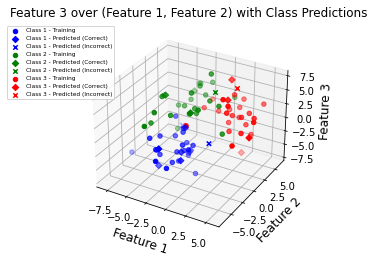

In [6]:
# Step 3: Fit a KNN model to the data and visualize
# %matplotlib qt <- ENABLE TO ROTATE
%matplotlib inline

## Create and fit model
model = KNN(n_neighbors = 4)
model.fit(train_features, train_targets)
predictions = model.predict(test_features)

## Visualize
visualize_blobs(train_features, train_targets, test_features, test_targets, predictions)

#### Scikit Implementation

In [7]:
# Step 2: Extract training and test features/targets
train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features, targets, train_size = 0.8, test_size = 0.2)

Per inspection, the sklearn implementation does about as well as the from-scratch one.

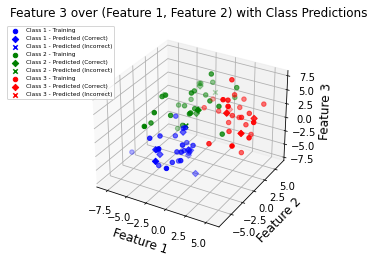

In [8]:
# Step 3: Fit a KNN model to the data and visualize
# %matplotlib qt <- ENABLE TO ROTATE
%matplotlib inline

## Create and fit model
model = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean")
model.fit(train_features, train_targets)
predictions = model.predict(test_features)

## Visualize
visualize_blobs(train_features.T,
 train_targets.reshape((1, train_targets.shape[0])),
 test_features.T,
 test_targets.reshape((1, test_targets.shape[0])),
 predictions.reshape((1, predictions.shape[0])))

### Section 1b: IRIS.csv

Let's now try to use the KNN-classifier on a real dataset: the [IRIS dataset](https://archive.ics.uci.edu/ml/datasets/Iris) from UC Irvine.

In [9]:
# Step 1: Import "IRIS.csv"
with open("data/IRIS.csv", 'r') as file:
    csv_reader = reader(file)
    feature_names = list(next(csv_reader))
    data = np.array(list(csv_reader))

In [10]:
# Step 2: Wrangle data
feature_names = feature_names[:-1]
features = data[:,:-1].astype("float").T
targets = data[:,-1]
targets = targets.reshape((1, targets.shape[0]))

#### From Scratch Implementation

In [11]:
# Step 3: Extract traing and test features/targets
train_features, train_targets, test_features, test_targets = train_test_split(features, targets)

As we can see, the from-scratch implementation is close to perfect accuracy.

In [12]:
# Step 4: Fit a KNN model to the data and predict values
model = KNN(n_neighbors=5)
model.fit(train_features, train_targets)
predictions = model.predict(test_features)

print("Accuracy = " + str(100 * np.sum(predictions == test_targets)/predictions.shape[1]) + "%")

Accuracy = 96.66666666666667%


Scikit  Implementation

In [13]:
# Step 3: Extract training and test features/targets
train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T, train_size = 0.8, test_size = 0.2)

The sklearn implementation the same as the from-scratch implementation.

In [14]:
# Step 4: Fit a KNN model to the data and predict values
model = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean")
model.fit(train_features, train_targets)
predictions = model.predict(test_features)

print("Accuracy = " + str(100 * np.sum(predictions == test_targets.flatten())/predictions.shape[0]) + "%")

Accuracy = 96.66666666666667%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Part 2: Collaborative Filter

Another use of the K-Nearest-Neighbor model is collaborative filtering.  Here, we'll run our model on the [Movielens dataset](https://grouplens.org/datasets/movielens/latest/).

In [15]:
# Step 1: Import movielens data and wrange it to desired shape
raw_data = np.loadtxt(fname = "data/movielens.data", delimiter = '\t', dtype = "int")

## Create an array where rows are the user_id and cols are the movie_id
refined_data = np.zeros(shape = (943, 1682))

## User 1 -> User 0, ..., User n -> User n-1
for row in raw_data:
    user_id = row[0] - 1
    movie_id = row[1] - 1
    refined_data[user_id, movie_id] = row[2]

In [16]:
# Step 2: Replace all 0 values with median value of user's ratings and zero out randomly
import copy

original_data = copy.deepcopy(refined_data)

N = 3               # number of review scores per user to make 0
K = 15              # number of neighbors to look at
D = "manhattan"     # distance metric to use
A = "mean"          # aggregator to use

all_zeroed_ratings = []
for row_num in range(0, refined_data.shape[0]):
    non_zero_indicies = np.nonzero(refined_data[row_num])[0]

    # Replace with median
    median = np.median(refined_data[row_num, non_zero_indicies])
    refined_data[row_num] = np.where(refined_data[row_num] == 0, median,
                                     refined_data[row_num])

    # Randomly make N values 0
    zeroed_ratings = (refined_data[row_num, non_zero_indicies]
                      if len(non_zero_indicies) < N
                      else np.random.choice(non_zero_indicies, size=N, replace=False))
    all_zeroed_ratings.append(zeroed_ratings)
    refined_data[row_num, zeroed_ratings] = 0

In [17]:
# Step 3: Impute data
from from_scratch.collaborative_filter import collaborative_filter

refined_data = refined_data.T
original_data = original_data.T
all_zeroed_ratings = np.array(all_zeroed_ratings).T

imputed_data = collaborative_filter(refined_data, K, D, A)

As we can see, the mean-squared error of the model is only around 1.14, meaing that the mean error in imputing a rating is only about 1 star; this is not that bad considering that ```N``` is one-fifth the number of samples.

In [18]:
# Step 4: Calculate Error
squared_errors_sum = 0
for user_idx in range(0, imputed_data.shape[1]):
    zeroed_ratings = all_zeroed_ratings[:, user_idx]
    squared_errors_sum += np.sum(
        (original_data[zeroed_ratings, user_idx] - imputed_data[zeroed_ratings, user_idx])**2)
print("Mean-Squared Error: " +
      str(np.sqrt(squared_errors_sum/all_zeroed_ratings.size)))

Mean-Squared Error: 1.1402603340783743


In this notebook, I exhibited a from-scratch implementation of the KNN algorithm that performs just as well as its sklearn counterpart in a classification setting.  Furthermore, I showed how a modification on my from-scratch KNN algorithm could be used for naive collaborative filtering.